In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# 대여량 데이터 불러오기
data = pd.read_csv('./합본따릉이.csv')
data2= pd.read_csv('./기온강수량미세먼지2.csv')

# 데이터 탐색 및 전처리
# ...

# 회귀 분석에 사용할 변수 선택
# 예: 시간대, 날씨, 휴일 여부, 광고 여부 등

# 독립 변수와 종속 변수 지정
X = data2[['미세먼지', '평균기온(°C)', '일강수량(mm)']]
y = data['전체_건수']

# 데이터 분할 (학습 데이터셋과 테스트 데이터셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 출력
print("회귀 계수:", model.coef_)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)

# StatsModels를 사용한 회귀 분석 결과 출력
X_train = sm.add_constant(X_train) # 상수항 추가
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())


ValueError: Found input variables with inconsistent numbers of samples: [397, 3496967]

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 날씨 데이터 불러오기
weather_data = pd.read_csv('./기온강수량미세먼지2.csv', encoding='cp949')

# 대여 데이터 불러오기
rental_data = pd.read_csv('./합본따릉이.csv')

# 날씨 데이터와 대여 데이터를 병합
data = pd.merge(weather_data, rental_data, on='기준_날짜', how='inner')

# 독립 변수와 종속 변수 지정
X = data[['평균기온(°C)', '일강수량(mm)', '미세먼지']]
y = data['전체_건수']

# 데이터 분할 (학습 데이터셋과 테스트 데이터셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결측값 확인
print(data.isnull().sum())

# 결측값을 평균값으로 대체
data.fillna(data.mean(), inplace=True)


# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 출력
print("회귀 계수:", model.coef_)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = pd.read_csv('./합본따릉이.csv')
data2 = pd.read_csv('./기온강수량미세먼지2.csv', encoding='cp949')

# 독립 변수(X)와 종속 변수(y) 지정
X = data2[['평균기온(°C)', '일강수량(mm)', '미세먼지']]
y = data['전체_건수']

# 데이터 분할 (학습 데이터셋과 테스트 데이터셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습된 모델로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)


ValueError: Found input variables with inconsistent numbers of samples: [397, 3496967]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 불러오기
data = pd.read_csv('기온_데이터.csv')

# '날짜' 열을 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# '날짜' 열을 인덱스로 설정
data.set_index('날짜', inplace=True)

# 결측치 처리 (필요한 경우)
# data.dropna(inplace=True)

# 시계열 분해 (Trend, Seasonal, Residual)
result = seasonal_decompose(data['기온'], model='additive', period=365)

# 시각화
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(data['기온'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


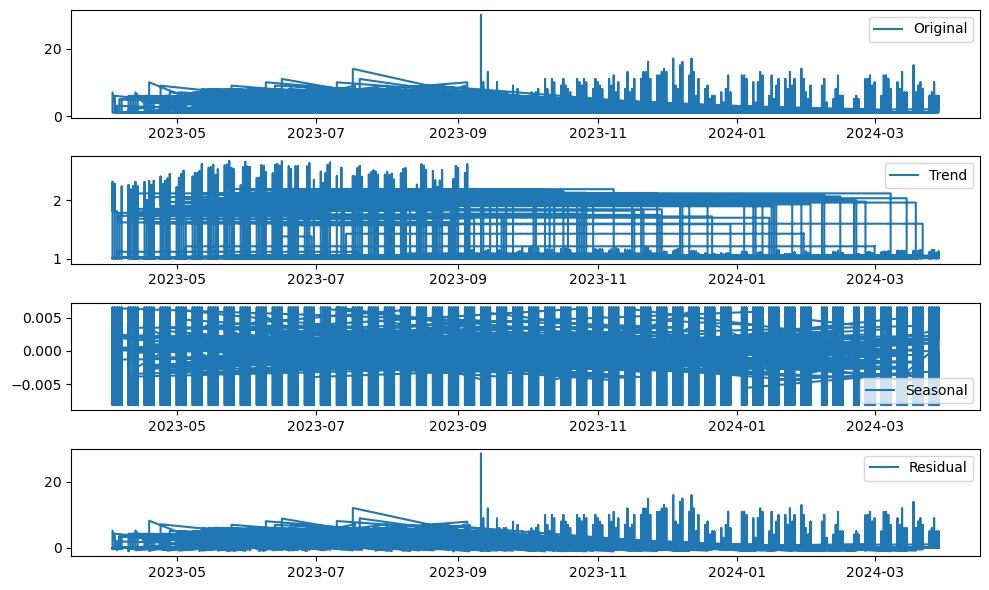

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 불러오기
data = pd.read_csv('./합본따릉이.csv')

# '날짜' 열을 datetime 형식으로 변환
data['기준_날짜'] = pd.to_datetime(data['기준_날짜'])

# '날짜' 열을 인덱스로 설정
data.set_index('기준_날짜', inplace=True)

# 결측치 처리 (필요한 경우)
# data.dropna(inplace=True)

# 시계열 분해 (Trend, Seasonal, Residual)
result = seasonal_decompose(data['전체_건수'], model='additive', period=365)

# 시각화
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(data['전체_건수'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('./강서_따릉이_데이터_01.csv')

# 출퇴근 시간대를 정의 (예: 출근 시간은 7시부터 9시까지, 퇴근 시간은 18시부터 20시까지)
commute_hours = [7, 8, 9, 10, 17, 18, 19, 20, 21]

# 데이터프레임에 대여 시간대 컬럼 추가
df['대여_시간'] = pd.to_datetime(df['기준_시간대'], format='%H').dt.hour

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_hours)]

# 7월 데이터만 추출
july_data = commute_data[commute_data['기준_날짜'].str.startswith('2024-07')]

# 일별 대여량 계산
daily_rentals = july_data.groupby('기준_날짜')['전체_건수'].sum()

print(daily_rentals)


ValueError: time data "0" doesn't match format "%H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('./강서_따릉이_데이터_01.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 540, 1080, 1200]

# 데이터프레임에 대여 시간대 컬럼 추가
df['대여_시간'] = pd.to_datetime(df['기준_시간대'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['기준_시간대'], format='%H:%M').dt.minute

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_minutes)]

# 7월 데이터만 추출
july_data = commute_data[commute_data['기준_날짜'].str.startswith('2024-07')]

# 일별 대여량 계산
daily_rentals = july_data.groupby('기준_날짜')['전체_건수'].sum()

print(daily_rentals)


ValueError: time data "0" doesn't match format "%H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('./강서_따릉이_데이터_01.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 540, 1080, 1200]

# 데이터프레임에 대여 시간대 컬럼 추가
df['대여_시간'] = df['기준_시간대'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_minutes)]

# 7월 데이터만 추출
july_data = commute_data[commute_data['기준_날짜'].str.startswith('2024-07')]

# 일별 대여량 계산
daily_rentals = july_data.groupby('기준_날짜')['전체_건수'].sum()

print(daily_rentals)



IndexError: list index out of range

In [14]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('./강서_따릉이_데이터_01.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 480, 540, 600, 1020, 1080, 1140, 1200, 1260]

# 데이터프레임에 대여 시간대 컬럼 추가 (이미 정수로 되어 있으므로 추가하지 않음)

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['기준_시간대'].isin(commute_minutes)]

# 7월 데이터만 추출
july_data = commute_data[commute_data['기준_날짜'].str.startswith('2023-04')]

# 일별 대여량 계산
daily_rentals = july_data.groupby('기준_날짜')['전체_건수'].sum()

print(daily_rentals)



기준_날짜
2023-04-03    209
2023-04-05      7
2023-04-10    169
2023-04-11     96
2023-04-14    171
2023-04-17    192
2023-04-19    214
2023-04-24    222
2023-04-25    113
2023-04-27    192
2023-04-28    246
Name: 전체_건수, dtype: int64


In [22]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('./강서_따릉이0102.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 480, 540, 600, 1020, 1080, 1140, 1200, 1260]

# 데이터프레임에 대여 시간대 컬럼 추가 (분 단위로 저장된다고 가정)
df['대여_시간'] = df['기준_시간대']

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_minutes)]

# 기준_날짜 열에서 연도와 월 정보 추출
commute_data['연도_월'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('M')

# 출퇴근 시간대의 월별 대여량 평균 계산
monthly_avg_rentals = commute_data.groupby('연도_월')['전체_건수'].mean()

print(monthly_avg_rentals)




연도_월
2023-04    1.038366
2023-05    1.046546
2023-06    1.050790
2023-07    1.045977
2023-08    1.044683
2023-09    1.047581
2023-10    1.064312
2023-11    1.052221
2023-12    1.045925
2024-01    1.050543
2024-02    1.057044
2024-03    1.065123
Freq: M, Name: 전체_건수, dtype: float64


C:\Users\evol0\AppData\Local\Temp\ipykernel_15840\2891026248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['연도_월'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('M')


In [23]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('./강서_따릉이0102.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 480, 540, 600, 1020, 1080, 1140, 1200, 1260]

# 데이터프레임에 대여 시간대 컬럼 추가 (이미 정수로 되어 있으므로 추가하지 않음)

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['기준_시간대'].isin(commute_minutes)]

# 7월 데이터만 추출
july_data = commute_data[commute_data['기준_날짜'].str.startswith('2023-04')]

# 일별 대여량 계산
daily_rentals = july_data.groupby('기준_날짜')['전체_건수'].sum()

print(daily_rentals)

기준_날짜
2023-04-03    209
2023-04-04    205
2023-04-05      7
2023-04-06     96
2023-04-07    180
2023-04-10    169
2023-04-11     96
2023-04-12    194
2023-04-13    182
2023-04-14    171
2023-04-17    192
2023-04-18     57
2023-04-19    214
2023-04-20    184
2023-04-21    213
2023-04-24    222
2023-04-25    113
2023-04-26    187
2023-04-27    192
2023-04-28    246
Name: 전체_건수, dtype: int64


In [21]:
import pandas as pd

# 첫 번째 CSV 파일 읽기
df1 = pd.read_csv('강서_따릉이_데이터_01.csv')

# 두 번째 CSV 파일 읽기
df2 = pd.read_csv('강서_따릉이_데이터_02.csv')

# 두 데이터프레임을 합치기 (기준 열이 있으면 on 옵션을 사용하여 병합할 수 있습니다)
merged_df = pd.concat([df1, df2])

# 병합된 데이터프레임을 CSV 파일로 저장
merged_df.to_csv('강서_따릉이0102.csv', index=False)  # index=False를 지정하여 인덱스를 저장하지 않도록 합니다


In [1]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('강서_따릉이0102.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 480, 540, 600, 1020, 1080, 1140, 1200, 1260]

# 데이터프레임에 대여 시간대 컬럼 추가 (분 단위로 저장된다고 가정)
df['대여_시간'] = df['기준_시간대']

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_minutes)]

# 기준_날짜 열에서 연도, 월, 일 정보 추출
commute_data['연도_월_일'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('D')

# 출근시간에 대여된 자전거 수 구하기
commute_data['출근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['전체_건수'].transform('sum')

# 퇴근시간에 대여된 자전거 수 구하기
commute_data['퇴근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([1020, 1080, 1140, 1200, 1260])].groupby('연도_월_일')['전체_건수'].transform('sum')

# 월별 출퇴근시간에 대여된 자전거 수 구하기
monthly_commute_data = commute_data.groupby('연도_월_일')[['출근시간_대여량', '퇴근시간_대여량']].max()

print(monthly_commute_data)


            출근시간_대여량  퇴근시간_대여량
연도_월_일                        
2023-04-03      46.0     163.0
2023-04-04      50.0     155.0
2023-04-05       3.0       4.0
2023-04-06      15.0      81.0
2023-04-07      39.0     141.0
...              ...       ...
2024-03-25      55.0     105.0
2024-03-26       5.0      74.0
2024-03-27      44.0     136.0
2024-03-28      26.0      80.0
2024-03-29      49.0      30.0

[254 rows x 2 columns]


C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\3509095854.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['연도_월_일'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('D')
C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\3509095854.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['출근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['전체_건수'].transform('sum')
C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\3509095854.py:22: S

In [2]:
import pandas as pd

# CSV 파일을 읽기
df = pd.read_csv('강서_따릉이0102.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 480, 540, 600, 1020, 1080, 1140, 1200, 1260]

# 데이터프레임에 대여 시간대 컬럼 추가 (분 단위로 저장된다고 가정)
df['대여_시간'] = df['기준_시간대']

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_minutes)]

# 기준_날짜 열에서 연도, 월, 일 정보 추출
commute_data['연도_월_일'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('D')

# 출근시간에 대여된 자전거 수 구하기
commute_data['출근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['전체_건수'].transform('sum')

# 퇴근시간에 대여된 자전거 수 구하기
commute_data['퇴근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([1020, 1080, 1140, 1200, 1260])].groupby('연도_월_일')['전체_건수'].transform('sum')

# 월별 출퇴근시간에 대여된 자전거 수 구하기
monthly_commute_data = commute_data.groupby('연도_월_일')[['출근시간_대여량', '퇴근시간_대여량']].max()

# 월별 출근시간의 평균 구하기
monthly_avg_commute_time = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['대여_시간'].mean()

# 월별 퇴근시간의 평균 구하기
monthly_avg_leave_time = commute_data[commute_data['대여_시간'].isin([1020, 1080, 1140, 1200, 1260])].groupby('연도_월_일')['대여_시간'].mean()

# 결과 출력
print("월별 출근시간과 퇴근시간의 대여량:\n", monthly_commute_data)
print("\n월별 출근시간의 평균:\n", monthly_avg_commute_time)
print("\n월별 퇴근시간의 평균:\n", monthly_avg_leave_time)


월별 출근시간과 퇴근시간의 대여량:
             출근시간_대여량  퇴근시간_대여량
연도_월_일                        
2023-04-03      46.0     163.0
2023-04-04      50.0     155.0
2023-04-05       3.0       4.0
2023-04-06      15.0      81.0
2023-04-07      39.0     141.0
...              ...       ...
2024-03-25      55.0     105.0
2024-03-26       5.0      74.0
2024-03-27      44.0     136.0
2024-03-28      26.0      80.0
2024-03-29      49.0      30.0

[254 rows x 2 columns]

월별 출근시간의 평균:
 연도_월_일
2023-04-03    570.000000
2023-04-04    562.500000
2023-04-05    560.000000
2023-04-06    572.000000
2023-04-07    563.684211
                 ...    
2024-03-25    548.235294
2024-03-26    528.000000
2024-03-27    573.658537
2024-03-28    565.000000
2024-03-29    554.666667
Freq: D, Name: 대여_시간, Length: 254, dtype: float64

월별 퇴근시간의 평균:
 연도_월_일
2023-04-03    1122.692308
2023-04-04    1129.668874
2023-04-05    1125.000000
2023-04-06    1122.750000
2023-04-07    1131.678832
                 ...     
2024-03-25    1123.106796
2

C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\1109600198.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['연도_월_일'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('D')
C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\1109600198.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['출근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['전체_건수'].transform('sum')
C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\1109600198.py:22: S

C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\3888414445.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['연도_월_일'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('D')
C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\3888414445.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_data['출근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['전체_건수'].transform('sum')
C:\Users\evol0\AppData\Local\Temp\ipykernel_19556\3888414445.py:23: S

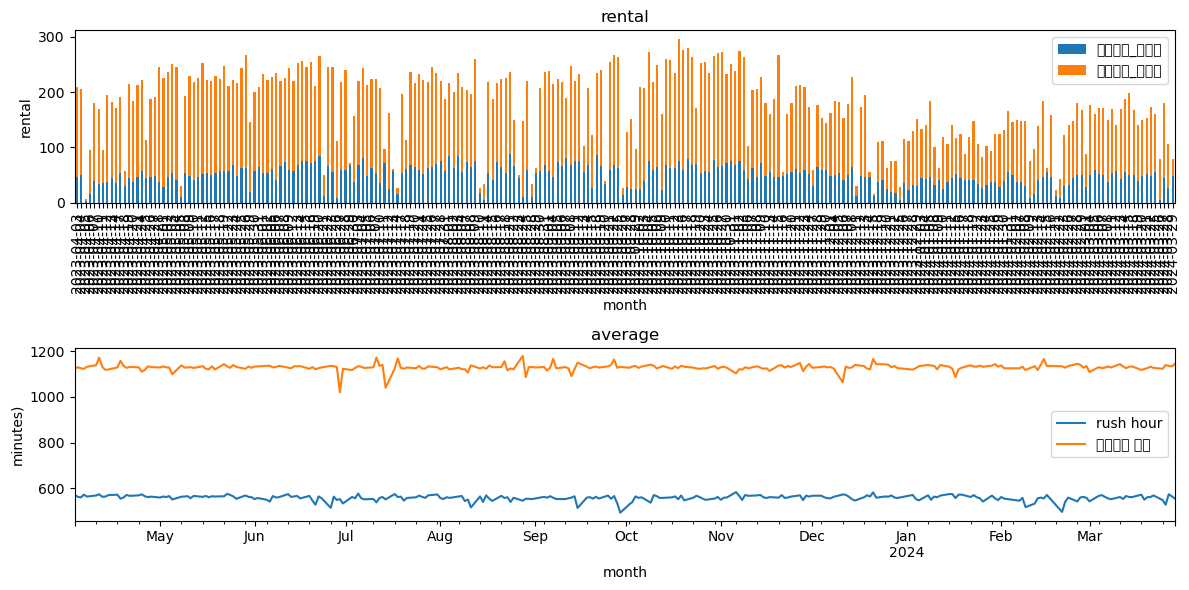

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽기
df = pd.read_csv('강서_따릉이0102.csv')

# 출퇴근 시간대를 분 단위로 정의 (예: 출근 시간은 420분부터 540분까지, 퇴근 시간은 1080분부터 1200분까지)
commute_minutes = [420, 480, 540, 600, 1020, 1080, 1140, 1200, 1260]

# 데이터프레임에 대여 시간대 컬럼 추가 (분 단위로 저장된다고 가정)
df['대여_시간'] = df['기준_시간대']

# 출퇴근 시간대에 해당하는 데이터만 필터링
commute_data = df[df['대여_시간'].isin(commute_minutes)]

# 기준_날짜 열에서 연도, 월, 일 정보 추출
commute_data['연도_월_일'] = pd.to_datetime(commute_data['기준_날짜']).dt.to_period('D')

# 출근시간에 대여된 자전거 수 구하기
commute_data['출근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['전체_건수'].transform('sum')

# 퇴근시간에 대여된 자전거 수 구하기
commute_data['퇴근시간_대여량'] = commute_data[commute_data['대여_시간'].isin([1020, 1080, 1140, 1200, 1260])].groupby('연도_월_일')['전체_건수'].transform('sum')

# 월별 출퇴근시간에 대여된 자전거 수 구하기
monthly_commute_data = commute_data.groupby('연도_월_일')[['출근시간_대여량', '퇴근시간_대여량']].max()

# 월별 출근시간의 평균 구하기
monthly_avg_commute_time = commute_data[commute_data['대여_시간'].isin([420, 480, 540, 600])].groupby('연도_월_일')['대여_시간'].mean()

# 월별 퇴근시간의 평균 구하기
monthly_avg_leave_time = commute_data[commute_data['대여_시간'].isin([1020, 1080, 1140, 1200, 1260])].groupby('연도_월_일')['대여_시간'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 월별 출퇴근시간에 대여된 자전거 수 그래프
plt.subplot(2, 1, 1)
monthly_commute_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('rental')
plt.xlabel('month')
plt.ylabel('rental')

# 월별 출근시간 및 퇴근시간의 평균 그래프
plt.subplot(2, 1, 2)
monthly_avg_commute_time.plot(kind='line', label='rush hour', ax=plt.gca())
monthly_avg_leave_time.plot(kind='line', label='퇴근시간 평균', ax=plt.gca())
plt.title('average')
plt.xlabel('month')
plt.ylabel('minutes)')
plt.legend()

plt.tight_layout()
plt.show()
